# <span style='color:green'> Yulu: Case Study </span>

### Table of content
1. [Problem definition](#problem-definition)
    1. [About Yulu](#about)
    1. [Problem](#problem)
    1. [Objective of the case study](#objective)
1. [Exploratory Data Analysis and Preprocessing](#eda)
    1. [Basic Data Analysis](#basic)
    1. [Non Visual Analysis](#non-visual)
    1. [Univariate, Bivariate and Multivariate Analysis](#visual)
1. [Hypothesis Testing](#hypothesis-testing)
    1. [t-test](#ttest)
    1. [ANOVA](#anova)
    1. [Chi2 test](#chi2)
1. [Conclusion and Business Insights](#conclusion)

<a id='problem-definition'></a>
# Problem Definition

<a id='about'></a>
### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

<a id='problem'></a>
### Problem
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know which variables are significant in predicting the demand for shared electric cycles in the Indian market? How well those variables describe the electric cycle demands

### Objective of the case study
- Perform EDA and find out the behaviour of the dataset
- Perform statistical tests to derive which variable have impact on bike demand
    - t-test
    - ANOVA
    - chi2 test

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading dataset
data = pd.read_csv('Yulu.csv')

<a id='eda'></a>
# Exploratory Data Analysis and Preprocessing

<a id='basic'></a>
## Basic Data Exploration

#### Column Profiling (As given in the problem statement):

- *datetime*: datetime
- *season*: season (1: spring, 2: summer, 3: fall, 4: winter)
- *holiday*: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- *workingday*: if day is neither weekend nor holiday is 1, otherwise is 0.
- *weather*:<br>
    1: Clear, Few clouds, partly cloudy, partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- *temp*: temperature in Celsius
- *atemp*: feeling temperature in Celsius
- *humidity*: humidity
- *windspeed*: wind speed
- *casual*: count of casual users
- *registered*: count of registered users
- *count*: count of total rental bikes including both casual and registered

In [ ]:
# head
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# shape
data.shape

(10886, 12)

In [ ]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


>#### Observations
>1. There 10886 datapoints and 12 columns
>1. There are no missing values in the dataset
>1. datetime columns is an object in the dataframe. We need to convert it to datetime datatype.

In [ ]:
# convert datetime columns to datetime datatype
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
# adding additional features based on datetime
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['hour'] = data['datetime'].dt.hour

In [ ]:
# describe
np.round(data.describe(),2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.0,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57,9.99,6.52,2011.5,11.54
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14,5.48,3.44,0.5,6.92
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2011.0,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00,5.00,4.00,2011.0,6.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00,10.00,7.00,2012.0,12.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00,15.00,10.00,2012.0,18.00
max,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00,19.00,12.00,2012.0,23.00


In [ ]:
# date range of the data collection
print(f"Data start date: {data['datetime'].min()}")
print(f"Data end date: {data['datetime'].max()}")

Data start date: 2011-01-01 00:00:00
Data end date: 2012-12-19 23:00:00


> #### Observations
>1. Mean and median of *temp, atemp, humidity and windspeed* are very close to each other. This means that their distribution is not skewed
>1. Mean and median of *casual, registered and count* is well separated from each other. This means their distribution is skewed and there might be outliers
>1. The max value of day column is 19. This means the samples are collected only withing the first 19 days of the month
>1. The data is collected from 1st January 2011 till 19th December 2012

<a id='non-visual'></a>
## Non Visual Analysis

In [ ]:
# season
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
# holiday
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
# workingday
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
# weather
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
# day
data['day'].value_counts()

1     575
9     575
17    575
5     575
8     574
19    574
7     574
14    574
13    574
4     574
15    574
16    574
12    573
3     573
2     573
6     572
10    572
11    568
18    563
Name: day, dtype: int64

In [ ]:
data['month'].value_counts()

8     912
12    912
5     912
6     912
7     912
10    911
11    911
9     909
4     909
2     901
3     901
1     884
Name: month, dtype: int64

In [ ]:
data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [ ]:
data['hour'].value_counts()

23    456
20    456
16    456
15    456
17    456
22    456
14    456
18    456
21    456
19    456
13    456
12    456
7     455
6     455
0     455
8     455
11    455
10    455
9     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

>#### Observations
>- datapoints in *season, day, month, year and hour* are well balanced
>- datapoints in *holiday, workingday and weather* are imbalanced
>- There is only 1 datapoint in weather: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<a id='visual'></a>
## Univariate, Bivariate and Multivariate Analysis (Visual)

#### Temperature

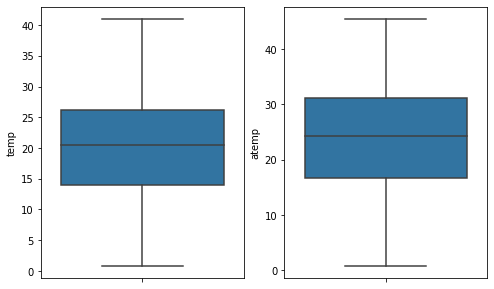

In [ ]:
# temperature
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['temp'])
plt.subplot(1,2,2)
sns.boxplot(y=data['atemp'])
plt.show()

> #### Observations
> - There are no outliers in any temperature column
> - The range of both temperatures is ~0-41
> - The IQR of atemp is slightly higher than that of temp

In [ ]:
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.984948
atemp,0.984948,1.000000


**Note:** Since there is a very high correlation between temp and atemp, also their distribution is quite similar, let's only analyze the temp column

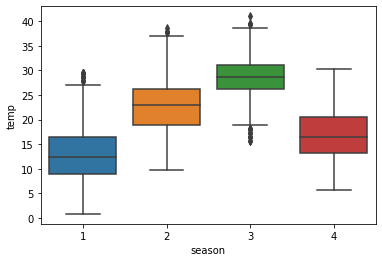

In [ ]:
sns.boxplot(data=data,y='temp',x='season')
plt.show()

>#### Observations
> 1:spring 2:summer 3:fall 4:winter
>- The temperatures in winter is more than that in spring
>- The temperatires in summer is less than that of fall

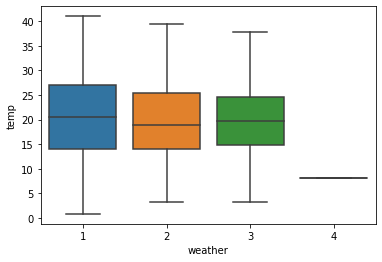

In [ ]:
sns.boxplot(data=data,y='temp',x='weather')
plt.show()

>#### Observations
>- There is not a lot of variation in the temperatures between weathers
>- weather = 4 has only one datapoint, hence the distribution is like this

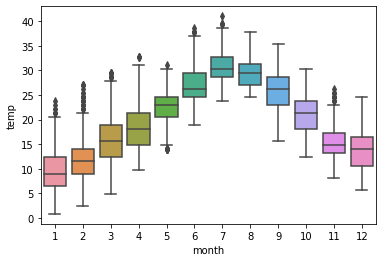

In [ ]:
sns.boxplot(data=data,y='temp',x='month')
plt.show()

>#### Observations
>- The temp increases as the months increases upto 7, then it decreases up till 12

#### Humidity

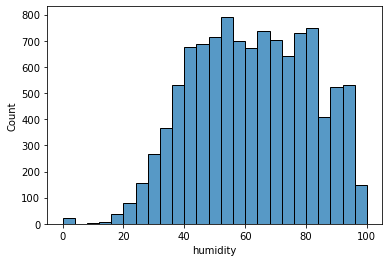

In [ ]:
sns.histplot(data=data,x='humidity',bins=25)
plt.show()

>#### Observations
>- The distribution is more like uniform in the range 40-80

#### Windspeed

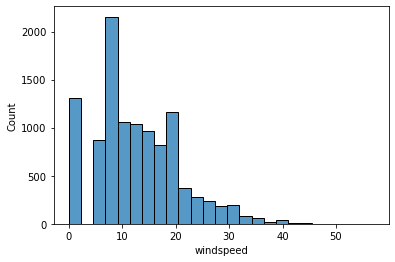

In [ ]:
sns.histplot(data=data,x='windspeed',bins=25)
plt.show()

#### Count

<AxesSubplot:ylabel='count'>

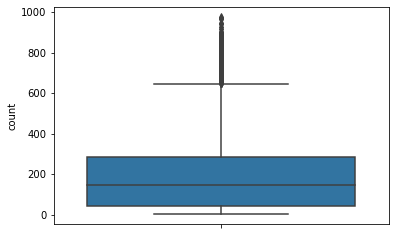

In [ ]:
sns.boxplot(data=data,y='count')

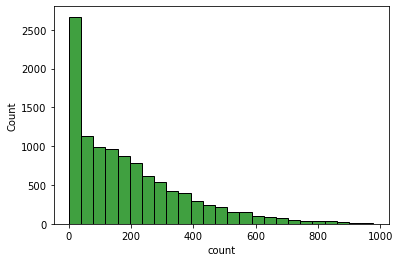

In [ ]:
sns.histplot(data=data,x='count',bins=25,color='green')
plt.show()

>#### Observations
>- There are many outliers in the count column
>- The distribution of count is similar to power law or pareto distribution

In [ ]:
# sanity check for the count column
# the sum of casual and registered should be equal to count
(data['casual']+data['registered']-data['count']).value_counts()

0    10886
dtype: int64

### Correlations

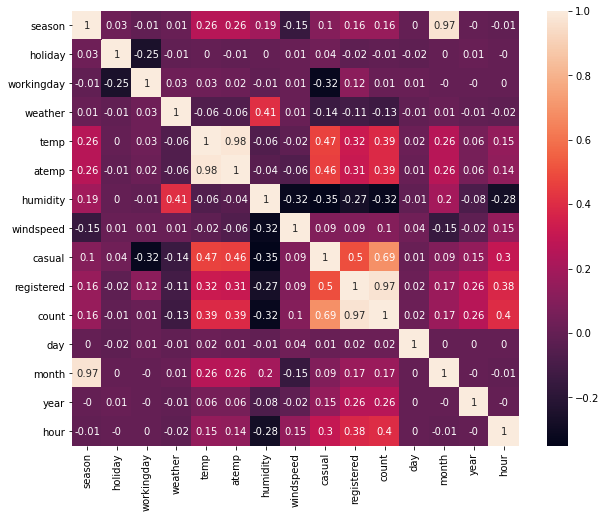

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(np.round(data.corr(),2),annot=True)
plt.show()

>#### Observations
>- month and season strongly correlated
>- atemp and temp are highly correlated
>- count and registered are strongly correlated, so we will take only count in our analysis
>- casual and count are moderately correlated
>- casual and temp are moderately correlated

<a id='hypothesis-testing'></a>
# Hypothesis Testing

<a id='ttest'></a>
## t-test

    t-test is performed to conclude whether there is any statistically significant difference between distributions of any two category of a feature. The constraint is that at a time, t-test cannot be performed on more than two categories

In [ ]:
# importing ttest
from scipy.stats import ttest_ind

In [ ]:
# defining a function to print the results of statistical test
def accept_reject(test_statistic,pvalue):
    if pvalue < 0.05:
        print(f"""There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = {np.round(test_statistic,2)}
The p-value = {np.round(pvalue,5)}""")
    else:
        print(f"""There isn't enough evidence which disproves the null hypothesis.
Hence, we fail to reject the null hypothesis.
The test statistic = {np.round(test_statistic,2)}
The p-value = {np.round(pvalue,5)}""")

<a id='holiday'></a>
### Holiday

First we will check whether holidays have an impact on demand of scooters or not. If yes, then we will check whether the demand increases or decreased during holidays.

<span style='color:blue'>**Test 1**<br>
**H0**: The day being a holiday or not does not have any effect on the demand of scooters.<br>
**HA**: Holidays have an impact on demand of the scooters<br>
**Signifincance level:** Since there is no significance level given, let's take a standard 95% confidence, which implies the significance level alpha = 0.05</span>

Here, since holiday is bi-categorical variable, we will apply t-test of two independent variables.

In [ ]:
# initializing samples
sample_0 = data.loc[data['holiday']==0,'count']
sample_1 = data.loc[data['holiday']==1,'count']

In [ ]:
# running the test
test_statistic, pvalue = ttest_ind(sample_0,sample_1)

In [ ]:
# displaying the results
accept_reject(test_statistic,pvalue)

There isn't enough evidence which disproves the null hypothesis.
Hence, we fail to reject the null hypothesis.
The test statistic = 0.56
The p-value = 0.57369


>#### Obeservations
>- Based on the sample, the difference in demand on holidays and non-holidays are not statistically significant.
>- <span style='color:red'>There isn't enough evidence to reject our null hypothesis</span>

- One this to notice here is that the sample size of the two categories differs a lot. Let's try to test with a similar sample size and check whether sample size is a factor in t-test.

#### Testing with a similar sample size

In [ ]:
# initializing samples
sample_0 = data.loc[data['holiday']==0,'count'].sample(frac=0.03)
sample_1 = data.loc[data['holiday']==1,'count']

In [ ]:
print(len(sample_0),len(sample_1))

317 311


In [ ]:
# running the test
test_statistic, pvalue = ttest_ind(sample_0,sample_1)

In [ ]:
# displaying the results
accept_reject(test_statistic,pvalue)

There isn't enough evidence which disproves the null hypothesis.
Hence, we fail to reject the null hypothesis.
The test statistic = 0.41
The p-value = 0.68248


>#### Observations
>- By taking similar sample size also, the p-value does not change much (The hypothesis test gives same result). This means that the difference in sample sizes does not have any effect on t-test.

<a id='working-day'></a>
### Working day
First we will check whether working days have an impact on demand of scooters or not. If yes, then we will check whether the demand increases or decreased during working days.

<span style='color:blue'>**Test 1**<br>
**H0**: The day being a working day or not does not have any impact on the demand of scooters.<br>
**HA**: Working days have an impact on demand of the scooters<br>
**Signifincance level:** alpha = 0.05</span>

In [ ]:
# initializing samples
sample_0 = data.loc[data['workingday']==0,'count']
sample_1 = data.loc[data['workingday']==1,'count']

In [ ]:
# running the test
test_statistic, pvalue = ttest_ind(sample_0,sample_1)

In [ ]:
# displaying the results
accept_reject(test_statistic,pvalue)

There isn't enough evidence which disproves the null hypothesis.
Hence, we fail to reject the null hypothesis.
The test statistic = -1.21
The p-value = 0.22645


>#### Obeservations
>- Based on the sample, the difference in demand on working days and non working days are not statistically significant.
>- <span style='color:red'>There isn't enough evidence to reject our null hypothesis</span>

<a id='year'></a>
### Year
First we will check whether demand in 2011 and 2012 are similar or not. If no, then we will check whether the demand increases or decreased during those years.

<span style='color:blue'>**Test 1**<br>
**H0**: With years, there is no increase in demand of scooters<br>
**HA**: With years, the demand of scooters have changed<br>
**Signifincance level:** alpha = 0.05</span>

In [ ]:
# initializing samples
sample_0 = data.loc[data['year']==2011,'count']
sample_1 = data.loc[data['year']==2012,'count']

In [ ]:
# running the test
test_statistic, pvalue = ttest_ind(sample_0,sample_1)

In [ ]:
# displaying the results
accept_reject(test_statistic,pvalue)

There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = -28.14
The p-value = 0.0


>#### Obeservations
>- Based on the sample, the difference in demand in 2011 and 2012 is statistically significant.
>- <span style='color:green'>There is enough evidence to reject our null hypothesis and accept alternate hypothesis</span>

<span style='color:blue'>**Test 2**<br>
**H0**: With years, there is no increase in demand of scooters<br>
**HA**: With years, the demand of scooters have increased<br>
**Signifincance level:** alpha = 0.05</span>

This will be a left tailed t-test

In [ ]:
# initializing samples
sample_0 = data.loc[data['year']==2011,'count']
sample_1 = data.loc[data['year']==2012,'count']

In [ ]:
# running the test
test_statistic, pvalue = ttest_ind(sample_0,sample_1,alternative='less')

In [ ]:
# displaying the results
accept_reject(test_statistic,pvalue)

There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = -28.14
The p-value = 0.0


>#### Obeservations
>- Based on the sample, the demand in 2012 has increased than that in 2011.
>- <span style='color:green'>There is enough evidence to reject our null hypothesis and accept alternate hypothesis</span>

<a id='anova'></a>
## ANOVA

ANOVA is performed between a categorical and a numeric variable.

**Assumptions of ANOVA**:
1. The data is normally distributed
1. The variance between the categories are same
1. The Observations are independent of each other

Given the data, we can assume that the obeservations are independent of each other.<br>
We need to check whether the data is normally distributed or not. For this, we will use Q-Q plot.<br>
We will check the variance of each category and compare with each other

In [ ]:
# defining a function to plot Q-Q plots for all categories

import pylab
from scipy.stats import probplot
from scipy.stats import f_oneway

def qq(data,category,value):
    """
    This function plots Q-Q plots for the given variable
    """

    n = len(data[category].unique()) # number of unique categories
    rows = int(np.ceil(n/2)) # number of rows in the plot
    cols = 2 # number of columns in the plot

    plt.figure(figsize=(cols*5,rows*4))
    sub = 1

    # plotting Q-Q plots
    for cat in data[category].unique():

        plt.subplot(rows,cols,sub)
        sub+=1

        # comparing the distribution to normal distribution
        probplot(data.loc[data[category]==cat,value], dist='norm', plot=pylab)
        plt.title(f"Q-Q plot\n{cat}")

    plt.tight_layout()
    pylab.show()

### Season

In [ ]:
# checking the variance between the categories
print("Standard deviation between seasons")
print(np.round(data.groupby('season')['count'].apply(np.std),2))

Standard deviation between seasons
season
1    125.25
2    191.97
3    197.11
4    177.59
Name: count, dtype: float64


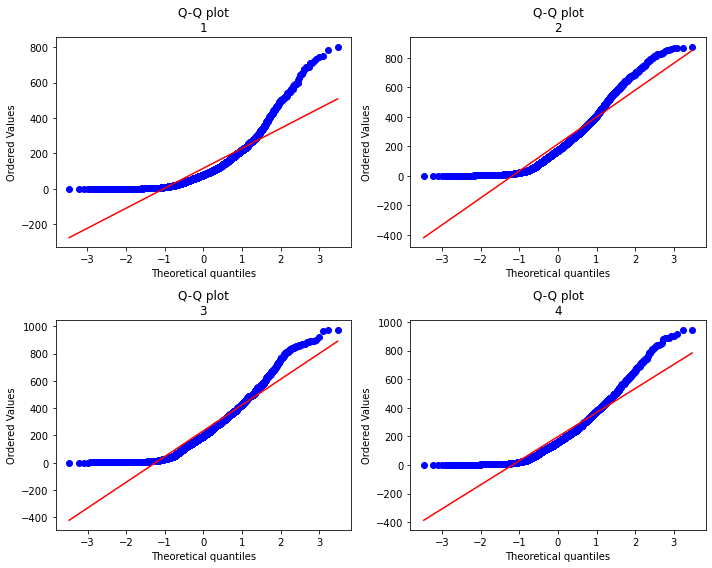

In [ ]:
# checking whether the distributions are normal or not
qq(data=data,category='season',value='count')

>#### Observations
>- The variance between the categories is not same, not even similar for that matter
>- The distribution of count for all the categories is not normal.
>- The result from ANOVA are not trustworthy

**ANOVA for season**<br>
<span style='color:blue'>**Test 1**<br>
**H0**: The demand of scooters in different seasons is not different<br>
**HA**: The demand of scooters differs in different seasons<br>
**Significance level:** alpha = 0.05</span>

In [ ]:
# applying ANOVA

test_statistic, pvalue = f_oneway(data.loc[data['season']==1,'count'],
                                  data.loc[data['season']==2,'count'],
                                  data.loc[data['season']==3,'count'],
                                  data.loc[data['season']==4,'count'],
                                 )

In [ ]:
accept_reject(test_statistic,pvalue)

There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = 236.95
The p-value = 0.0


>#### Observations
>- <span style='color:green'>We reject the null hypothesis and accept the alternate hypothesis</span>
>- The demand of scooters in different seasons is different

### Weather

In [ ]:
# checking the variance between the categories
print("Standard deviation between weather")
print(np.round(data.groupby('weather')['count'].apply(np.std),2))

Standard deviation between weather
weather
1    187.95
2    168.34
3    138.50
4      0.00
Name: count, dtype: float64


/Users/gaurav.sharma/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/gaurav.sharma/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/gaurav.sharma/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


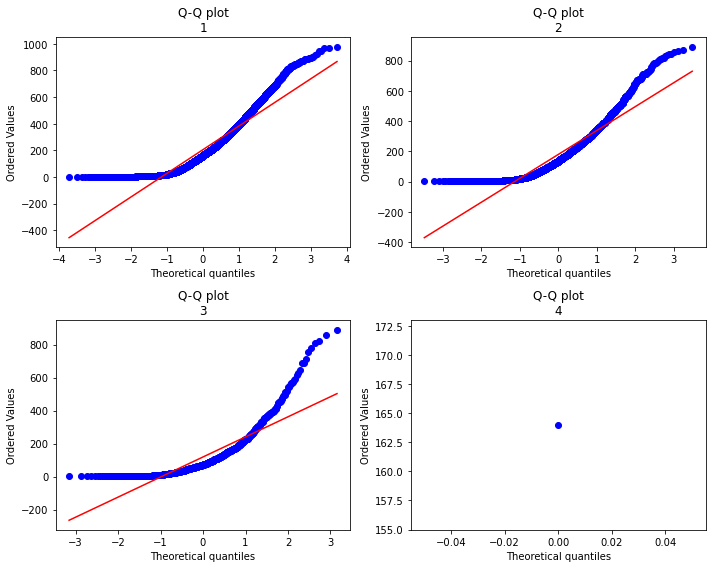

In [ ]:
# checking whether the distributions are normal or not
qq(data=data,category='weather',value='count')

>#### Observations
>- The variance between the categories is not same
>- The distribution of count for all the categories is not normal.
>- The result from ANOVA will not be trustworthy
>- Let's remove the category 4 since it only has 1 datapoint and the results might be skewed

**ANOVA for weather**<br>
<span style='color:blue'>**Test 1**<br>
**H0**: The demand of scooters in different weathers is not different<br>
**HA**: The demand of scooters differs in different weather<br>
**Significance level:** alpha = 0.05</span>

In [ ]:
# applying ANOVA

test_statistic, pvalue = f_oneway(data.loc[data['weather']==1,'count'],
                                  data.loc[data['weather']==2,'count'],
                                  data.loc[data['weather']==3,'count'],
                                 )

In [ ]:
accept_reject(test_statistic,pvalue)

There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = 98.28
The p-value = 0.0


>#### Observations
>- <span style='color:green'>We reject the null hypothesis and accept the alternate hypothesis</span>
>- The demand of scooters in different weathers is different

<a id='chi2'></a>
## Chi2 test

Chi2 test is performed between a categorical and categorical variable.

**Assumptions of Chi2 test**:
1. Cells in the contingency table are mutually exclusive
1. The frequency should be more than 5 in atleast 80% of the cells
1. The Observations are independent of each other

There are no duplicate timestamps in the data. So we can safely assume that the cells are independent.<br>
We have to check the frequency is greater than 5 in atleast 80% of the cells<br>
Given the data, we can assume that the obeservations are independent of each other.<br>

### Weather and Season

**Chi2 test**<br>
<span style='color:blue'>**Test 1**<br>
**H0**: Season does not have any impact on the weather<br>
**HA**: Season have an impact on the weather<br></span>

In [ ]:
# importing chi2
from scipy.stats import chi2_contingency

From the weather columns, we will remove category = 4 for the same reason discussed earlier

In [ ]:
ct = pd.crosstab(index=data.loc[data['weather']!=4,'weather'],columns=data['season'])
display(ct)

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


>#### Observations
>- The frequency in the contingency table is more than 5 in all the cases

In [ ]:
# performing chi2 test
test_statistic,pvalue,degF,expected = chi2_contingency(ct)

In [ ]:
accept_reject(test_statistic,pvalue)

There is enough evidence which disproves the null hypothesis.
Hence, reject the null hypothesis and accept the alternate hypothesis.
The test statistic = 46.1
The p-value = 0.0


>#### Observations
>- <span style='color:green'>We reject the null hypothesis and accept the alternate hypothesis</span>
>- Season have an impact on the weather

<a id='conclusion'></a>
# Conclusion

- Samples are collected only till 19th day of any month
- Weather = 4 has only one datapoint, so we will have to remove it in analysis
- There is no effect of data imbalance on statistical tests
- Distribution of humidity is similar to uniform
- The count columns follows a pareto distribution

## Business Insights and Recommendations

1. The demand of scooters on holidays and non-holidays do not differ. This might be because on holidays, the customers still needs the scooters for the following reasons: 1. Grocery errands and misc. shopping, 2. Meeting friends and relatives 3. Other tasks involving transit, 4. Essential services are still running on holidays, 5. Services like Swiggy, Zomato, Dunzo etc. are still running.
    1. <span style='color:blue'>The recommendation for Yulu is that is case of holidays, there can more scooters in residential areas since most of the customers will be present at home. Other recommendation is to analyse more data based on geo-location, and on holidays which kind of geography offers more demand.</span>
1. The demand of scooters on working day and non working day do not differ. The reasons for this might be similar.
    1. <span style='color:blue'>The recommendations are same as that in the case of Holidays</span>
1. The demand of scooters differ in different seasons as well as different weathers. As we analysed, the weather and season are not independent. If the weather is too extreme, like heavy rain, extreme heat or extreme cold, the customer would prefer using a cab or delay the plan altogether.
    1. <span style='color:blue'>The recommendation in this will be to offer customers deals which might push the customers in dilemma to use Yulu bikes instead of cabs. Since there is a significant difference in the rates of cabs and scooters, Yulu can leverage this information in their advantage.</span>
    1. <span style='color:blue'>Yulu can build a connection with customers by writing articles about how to be safe and careful while riding scooters. This can include driving safely in traffic, obeying traffic rules, how to be safe in different weather conditions etc. This will build trust in customers which will let them think that as a company, Yulu cares and they will not compromise with quality in their products. One such artile was posted by Yulu: [Article](https://medium.com/@yulubike/top-5-tips-for-cycling-in-hot-summer-weather-8e32428e1760)</span>
1. <span style='color:blue'>The demand problem can be further analysed by taking geo location as a variable. For example, in the morning time on a working day, there will be more demand from residential areas to office areas. Vice versa in the evening time. In the early morning, afternoon and pre-evening, people who are at home might want to run some errands or do some personal work, so the demand will be higher. So based on this kind of geo location data, Yulu can manage demand-supply in even better way.</span>
1. From the data we observed that the demand has increased from 2011 to 2012. But in the problem statement it is stated that the revenue has dipped. This mis-match might be happening due to incorrect sampling.